## Package requirements

In [1]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [2]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


## Boston Dataset

### Obtain the Dataset

In [6]:
from sklearn.datasets import fetch_california_housing
cali_data = fetch_california_housing()

In [7]:
print(cali_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [8]:
print("Keys: ", cali_data.keys())

Keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [9]:
print("Shape: ", cali_data.data.shape)

Shape:  (20640, 8)


In [10]:
print("Features Names: ", cali_data.feature_names)

Features Names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [13]:
from sklearn.datasets import fetch_openml
ames_data = fetch_openml(name="house_prices", as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [14]:
print(ames_data.DESCR)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

In [15]:
print("Keys: ", ames_data.keys())

Keys:  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [17]:
print("Shapes: ", ames_data.data.shape)

Shapes:  (1460, 80)


In [18]:
print("Feature Names: ", ames_data.feature_names)

Feature Names:  ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Poo

## Extract Data

In [11]:
# pass the data into a Pandas dataframe
cali_pd = pd.DataFrame(cali_data.data)
cali_pd.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
#Relabel the columns using feature names
cali_pd.columns = cali_data.feature_names
cali_pd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
# add homeprice to the pandas dataframe
cali_data.target[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [21]:
print("Shape of the target data: ", cali_data.target.shape)

Shape of the target data:  (20640,)


In [22]:
cali_pd['PRICE'] = cali_data.target
cali_pd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
# check types of features
cali_pd.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object


##Exploratory Data Analysis


### Check missing value

In [25]:
cali_pd.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [26]:
cali_pd

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [28]:
cali_pd.describe().transpose()
# Hàm describe() tính : count, mean, std ,min, max,..
#transpose() chuyển đổi dataframe từ dọc thành ngang và ngược lại

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
PRICE,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


### distribution of the target variable
phân phối biến mục tiêu

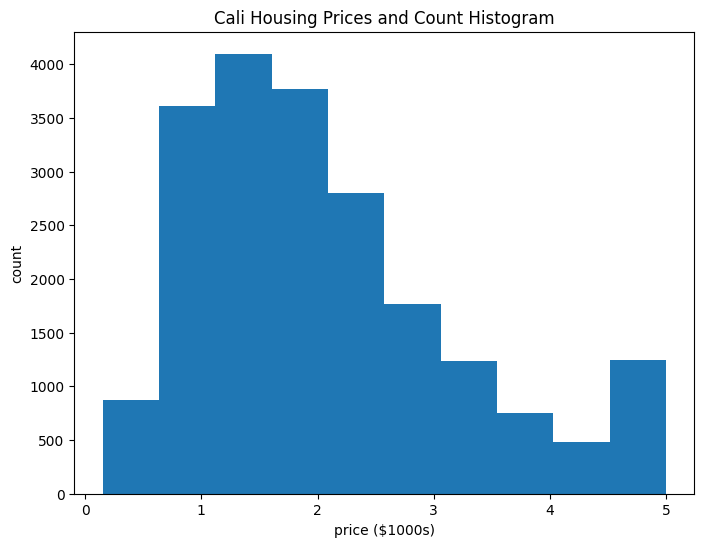

In [29]:
plt.figure(figsize = (8,6));# tạo 1 figure có kích thước 8x6 inches
plt.hist(cali_pd['PRICE']); # tạo biểu đồ histogram vẽ cho cột price
plt.title(
    'Cali Housing Prices and Count Histogram'
)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

<ipython-input-30-2e0e4b5c8d70>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cali_pd['PRICE'])


<Axes: xlabel='PRICE', ylabel='Density'>

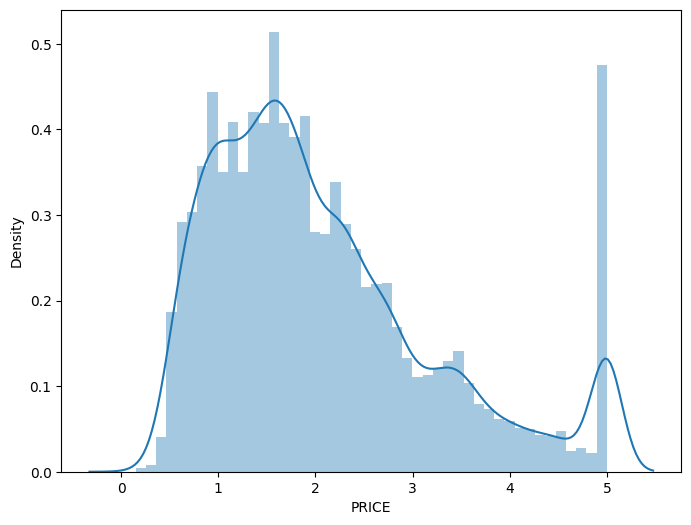

In [30]:
plt.figure(figsize = (8,6))
sns.distplot(cali_pd['PRICE'])# vẽ biểu đồ phân bố đường cong của PRICE

## Heat map

<Axes: >

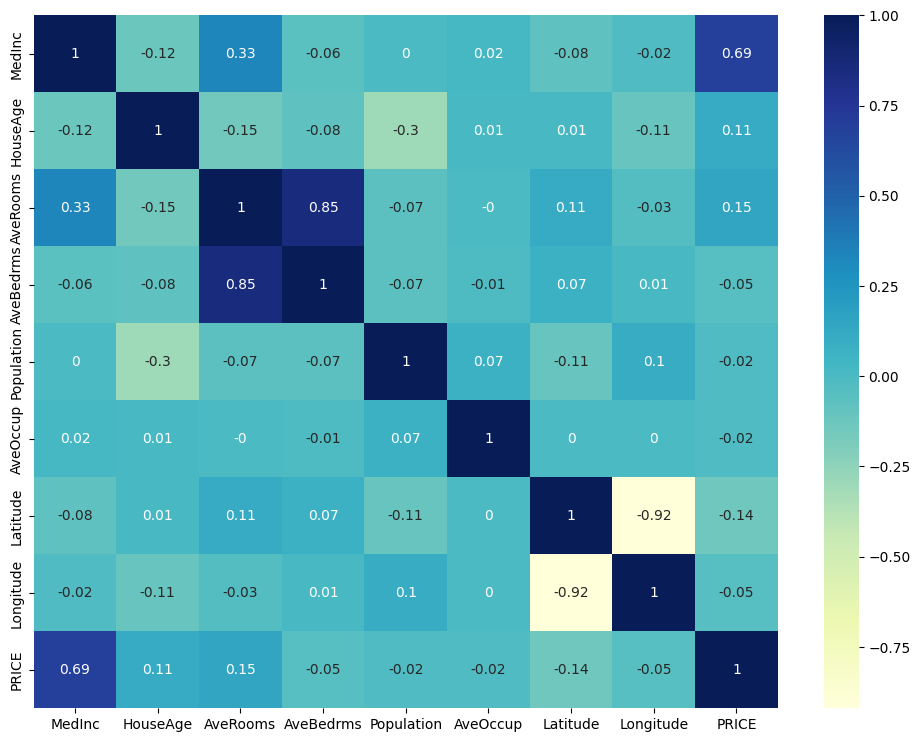

In [31]:
plt.figure(figsize =(12,9) )
correlation_matrix = cali_pd.corr().round(2)
# tính ma trận tương quan của cali_pd làm tròn tới 2 chữ số thập phân
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot = True)
# vẽ bản đồ nhiệt heatmap tương quan bằng màu sắc
# cmap="YlGnBu" đặt màu sắc từ dải màu  "YlGnBu"
#annot = True: cho phép hiển thị giá trị trên từng ô

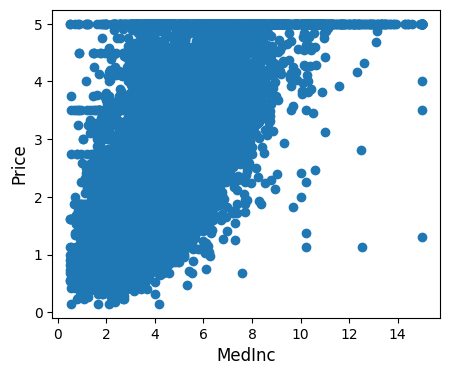

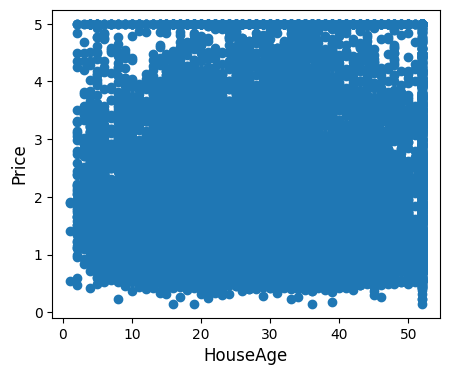

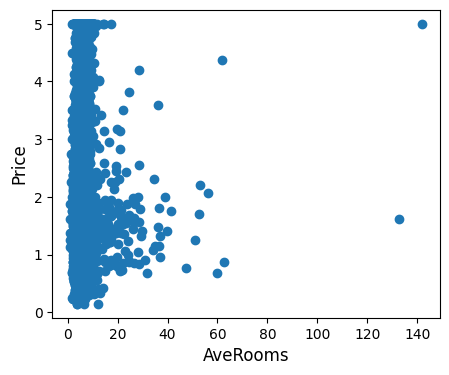

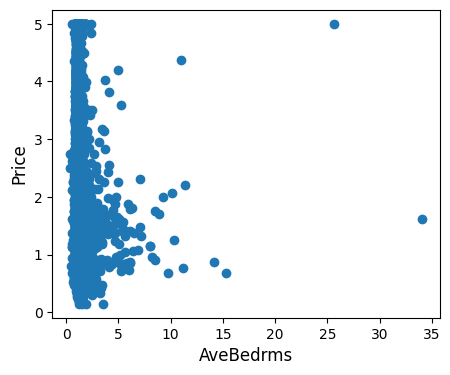

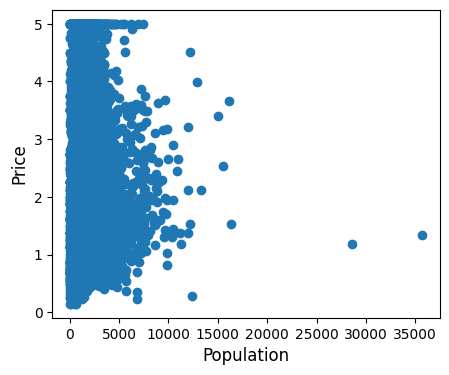

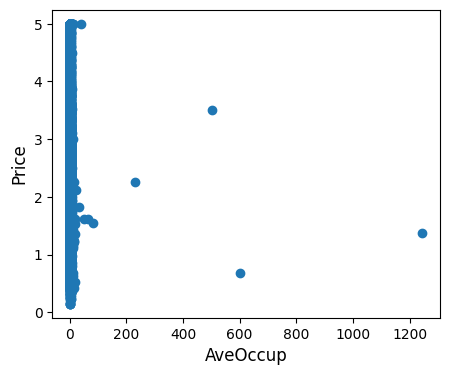

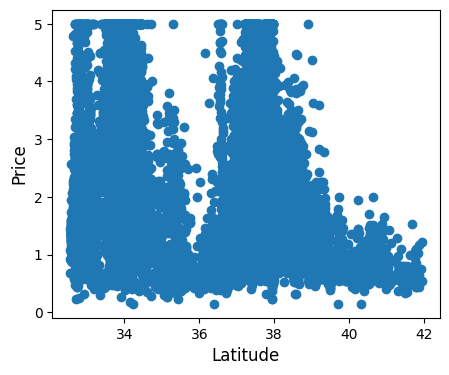

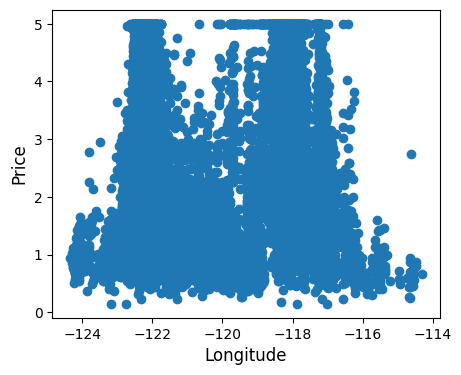

In [32]:
for feature_name in cali_data.feature_names:
  plt.figure( figsize = (5,4))
  plt.scatter(cali_pd[feature_name], cali_pd['PRICE'])
  plt.ylabel('Price', size = 12)
  plt.xlabel(feature_name, size = 12)
plt.show()

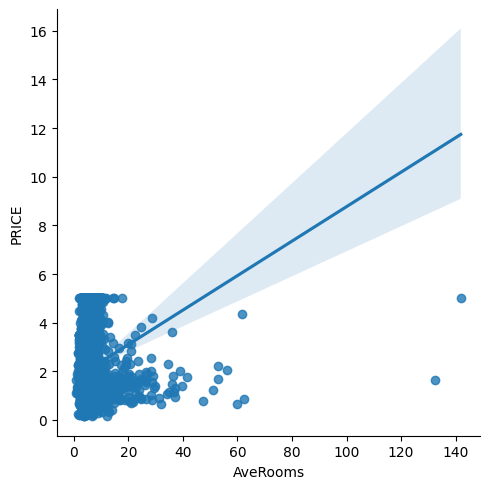

In [34]:
sns.lmplot(x = 'AveRooms', y = 'PRICE', data = cali_pd)
#lmplot vẽ đồ thị scatter plot với đường hồi quy tương ứng
# lmplot kết hợp tính năng của regplot và FacetGrid

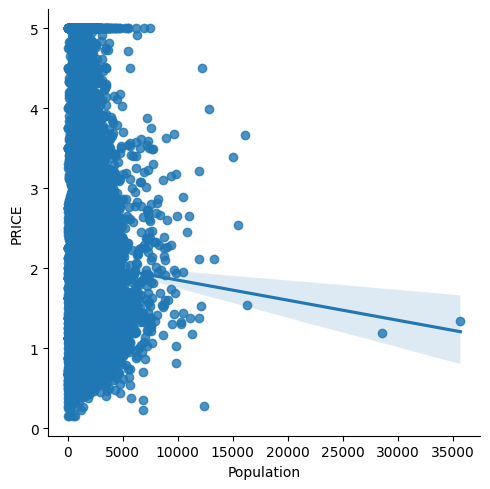

In [36]:
sns.lmplot( x = 'Population', y = 'PRICE', data = cali_pd)

## Simple Linear Model

In [37]:
X_rooms = cali_pd.AveRooms
y_price = cali_pd.PRICE

X_rooms = np.array(X_rooms).reshape(-1,1)
# chuyển đổi về mảng 2 chiều có số cột là 1 số hàng không xác định
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(20640, 1)
(20640, 1)


In [38]:
# Splitting the data into training and testing sets

X_train_1, X_test_1, Y_train_1, Y_test_1 = \
  train_test_split(X_rooms, y_price, test_size= 0.2, random_state = 5)

#

print(X_train_1.shape)
print(Y_train_1.shape)
print(X_test_1.shape)
print(Y_test_1.shape)

(16512, 1)
(16512, 1)
(4128, 1)
(4128, 1)


### training and testing the model

In [39]:
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(metrics.mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1.135651911787784
R2 score is 0.02


